In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [3]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [4]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

In [5]:
# linear regression
#b = -120
#w = -4
b=-2
w=0.01
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)

Step 0, w: 1.8648, b: -1.9952, Loss: 413789.3821
Step 10000, w: 2.1484, b: -7.1183, Loss: 19355.2329
Step 20000, w: 2.1627, b: -12.1013, Loss: 18858.5836
Step 30000, w: 2.1766, b: -16.9474, Loss: 18388.8578
Step 40000, w: 2.1902, b: -21.6603, Loss: 17944.5958
Step 50000, w: 2.2034, b: -26.2436, Loss: 17524.4173
Step 60000, w: 2.2162, b: -30.7010, Loss: 17127.0167
Step 70000, w: 2.2286, b: -35.0359, Loss: 16751.1593
Step 80000, w: 2.2407, b: -39.2517, Loss: 16395.6772
Step 90000, w: 2.2525, b: -43.3516, Loss: 16059.4658
Step 100000, w: 2.2640, b: -47.3389, Loss: 15741.4804
Step 110000, w: 2.2751, b: -51.2165, Loss: 15440.7331
Step 120000, w: 2.2860, b: -54.9876, Loss: 15156.2893
Step 130000, w: 2.2965, b: -58.6551, Loss: 14887.2653
Step 140000, w: 2.3067, b: -62.2217, Loss: 14632.8251
Step 150000, w: 2.3167, b: -65.6903, Loss: 14392.1781
Step 160000, w: 2.3264, b: -69.0637, Loss: 14164.5766
Step 170000, w: 2.3358, b: -72.3442, Loss: 13949.3134
Step 180000, w: 2.3450, b: -75.5347, Loss: 

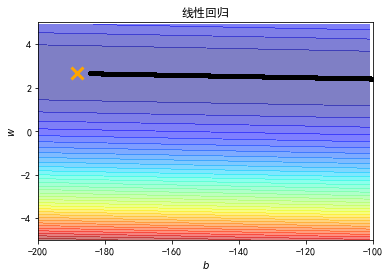

In [6]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()

In [7]:
# linear regression
b = -120
w = -4
lr = 1
iteration = 100000

b_history = [b]
w_history = [w]

lr_b=0
lr_w=0
import time
start = time.time()
for i in range(iteration):
    b_grad=0.0
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad-2.0*(y_data[n]-n-w*x_data[n])*1.0
        w_grad= w_grad-2.0*(y_data[n]-n-w*x_data[n])*x_data[n]
    
    lr_b=lr_b+b_grad**2
    lr_w=lr_w+w_grad**2
    # update param
    b -= lr/np.sqrt(lr_b) * b_grad
    w -= lr /np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)

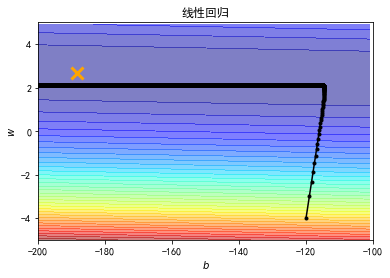

In [8]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()